# Project: Invesitgating The Movie Database (TMDb) for trends and

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, we will be examining The Movie Database (TMDb) which contains data of over 10,000 movies. The data contains information on how well the movie was received (popularity), as well as the budget, revenue, genre, and many other details about each movie. 

>Some of the questions we will answer with this anaylsis are below.
 - Is higher popularity associated with higher budgets?
 - What types of characteristics are associated with the most popular movies?
 - What genre of movie has the highest revenue?
 - What director creates the most popular movies? 
 - Are movies that are released in a specific month more popular than others?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>There are missing values in the following columns:
 - homepage
 - cast 
 - tagline
 - overview
 - keywords
 - production company

>To answer our questions, we do not need homepage, imdb_id, cast, keywords, tagline, overview, or production company, so these columns will be dropped. We will also drop budget and revenue and use only the adjusted budget and revenue columns. This will be done in the data cleaning section. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>A relatively small amount of rows are missing data in the genres and director categories. Because these are necessary to the analysis and cannot be infered from the remainder of the data, we will simply drop these values. 

>Next, we will examine the datatypes of the remaining columns to make sure they make sense.

In [6]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

>Because the analysis will utilize the release date, we will need to convert the column from string to datetime. The rest of the data types look appropriate.

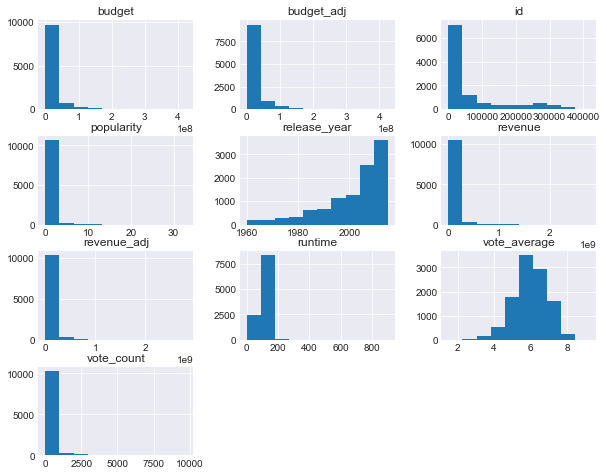

In [7]:
df.hist(figsize=(10,8));

>Some basic conclusions that can be made from the overview histograms are:
 - There are far more low popularity movies than there are high popularity movies. 
 - There are many more movies that make very little money, and only a few movies that make a lot of money.
 - There are many more movies that have very low budgets, and only a few movies that have very large budgets.
 - Despite the two above descrepencies, there is a relatively normal distribution, slightly right-skewed vote average.

### Data Cleaning 
>In the data exploration section, we identified the columns that can be dropped, and decided that the null value rows can also be removed from the dataset. 

>I will also change the 'release_date' column to datetime so we can work with it later.

>I will continue the data cleaning process by separating out only the first genre listed in the genres column. This will be the one gennre that we will perform the analyses on. 

In [8]:
df.drop(['homepage','cast','tagline','overview','production_companies','budget','revenue','imdb_id','keywords'], axis=1, inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
#convert the release_date column from string to datetime.
df['release_date'] = pd.to_datetime(df['release_date'])

In [11]:
#separate the genres in the genres column, keep only first listed
df['genres'] = df['genres'].str.split('|',0,expand=True)[0]

<a id='eda'></a>
## Exploratory Data Analysis


### What are general characteristics of the most popular movies?

>First, I want to see if vote_average and the popularity indicators are correlated. This will help me determine which column I want to use to determine the success of the movie. 

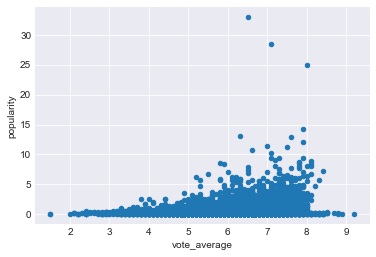

In [12]:
df.plot(x='vote_average', y='popularity',kind='scatter');

>Wow, there are only 3 movies that have high popularity. There are a large number of movies that very low popularity, but pretty high vote_average. This must mean that not very many people saw the movie, yet the people that did really enjoyed it. Both of these variables seem like important indicators of success, so I will look at both separately and together.

### Is higher popularity associated with higher budgets?

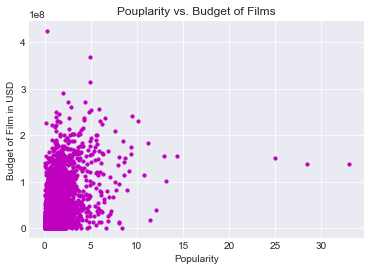

In [13]:
plt.scatter(df['popularity'],df['budget_adj'],s=10,color='m')
plt.title('Pouplarity vs. Budget of Films')
plt.xlabel('Popularity')
plt.ylabel('Budget of Film in USD');

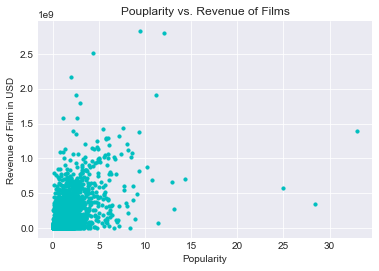

In [14]:
plt.scatter(df['popularity'],df['revenue_adj'],s=10,color='c')
plt.title('Pouplarity vs. Revenue of Films')
plt.xlabel('Popularity')
plt.ylabel('Revenue of Film in USD');

In [15]:
#I would like to find out what the three outliers to the right of each graph are. 
top3 = df.query('popularity > 20')
print(top3['original_title'])

0          Jurassic World
1      Mad Max: Fury Road
629          Interstellar
Name: original_title, dtype: object


>In general, movies that are more popular have a slightly higher budget, and slightly higher revenue. But the three outliers in popularity prove that this is not always the case. 

>The scatterplots are pretty busy due to the fine detail in the Popularity value. Below, we will bucket the movies in poularity rankings (high, medium, and low). 

In [16]:
low = df.popularity <= 10.993
medium = (df.popularity > 10.993) & (df.popularity < 21.986)
high = df.popularity > 21.986

In [17]:
rev = [df.revenue_adj[high].mean(),df.revenue_adj[medium].mean(),df.revenue_adj[low].mean()]
budg = [df.budget_adj[high].mean(),df.budget_adj[medium].mean(),df.budget_adj[low].mean()]
rev_series = pd.Series(rev)
budg_series = pd.Series(budg)

In [18]:
ind = np.arange(len(rev_series))
width=.35

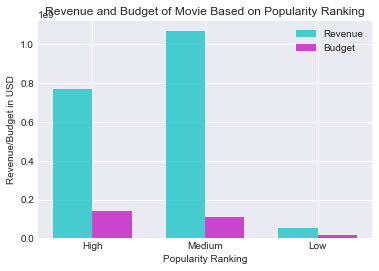

In [19]:
rev_bars = plt.bar(ind, rev_series, width, color='c',alpha=.7,label='Revenue')
budg_bars = plt.bar(ind+width, budg_series, width, color='m',alpha=.7,label='Budget')
plt.xlabel('Popularity Ranking')
plt.ylabel('Revenue/Budget in USD')
plt.title('Revenue and Budget of Movie Based on Popularity Ranking')
locations = ind + width / 2
labels = ['High','Medium','Low']
plt.xticks(locations,labels)
plt.legend()

## Vote Average Analysis

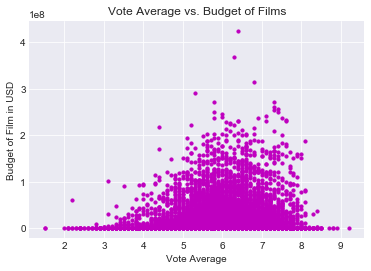

In [20]:
plt.scatter(df['vote_average'],df['budget_adj'],s=10,color='m')
plt.title('Vote Average vs. Budget of Films')
plt.xlabel('Vote Average')
plt.ylabel('Budget of Film in USD');

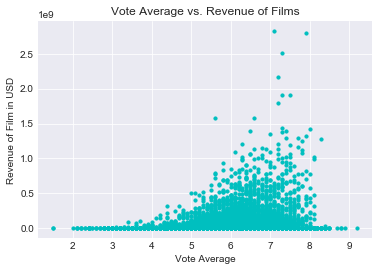

In [21]:
plt.scatter(df['vote_average'],df['revenue_adj'],color='c',s=10)
plt.title('Vote Average vs. Revenue of Films')
plt.xlabel('Vote Average')
plt.ylabel('Revenue of Film in USD');

### What genre of movie has the highest revenue?

In [22]:
genres_revenue = df.groupby('genres').mean()['revenue_adj']

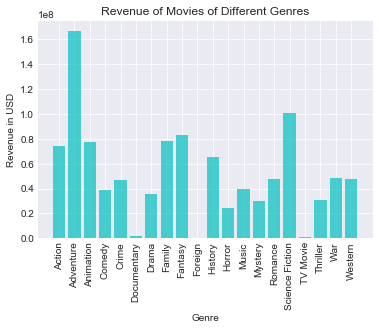

In [23]:
plt.bar(genres_revenue.index,genres_revenue,alpha=.7,color='c')
plt.title('Revenue of Movies of Different Genres')
plt.xlabel('Genre')
plt.ylabel('Revenue in USD')
plt.xticks(rotation=90);

In [24]:
genres_budget = df.groupby('genres').mean()['budget_adj']

### Are movies that are released in a specific month more popular than others?

In [25]:
#extract month from release_date
df['release_month'] = pd.DatetimeIndex(df['release_date']).month

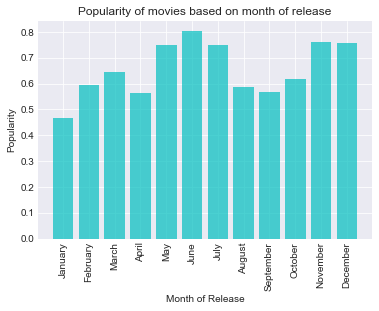

In [26]:
release_month_pop = df.groupby('release_month').mean()['popularity']
plt.bar(release_month_pop.index, release_month_pop, alpha=.7, color='c')
plt.title('Popularity of movies based on month of release')
plt.xlabel('Month of Release')
plt.xticks(np.arange(12)+1,('January','February','March','April','May','June','July','August','September','October','November','December'),rotation=90)
plt.ylabel('Popularity');

### Popularity of Genres from Year to Year

In [27]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
df.query('release_year > 2018')
#oops! There are a number of movies whose year is 2062 and 2066 That can't be right. 
#I am going to eliminate those movies.
df = df[df.release_year < 2018]
years = df['release_year'].sort_values()
years_df = years.to_frame()
years_df.drop_duplicates(inplace=True)
years_list = years_df['release_year'].tolist()

In [88]:
year_genres = df.groupby(['release_year','genres']).count()['id']
year_genres_df = year_genres.to_frame()
action_df = year_genres_df.query('genres == "Action"')
action_num = action_df['id'].tolist()

In [29]:
romance_df = year_genres_df.query('genres == "Romance"')
romance_num = romance_df['id'].tolist()

In [45]:
adventure_df = year_genres_df.query('genres == "Adventure"')
adventure_num = adventure_df['id'].tolist()

In [84]:
drama_df = year_genres_df.query('genres == "Drama"')
drama_num = drama_df['id'].tolist()

In [58]:
horror_df = year_genres_df.query('genres == "Horror"')
horror_num = horror_df['id'].tolist()

In [30]:
comedy_df = year_genres_df.query('genres == "Comedy"')
comedy_num = comedy_df['id'].tolist()

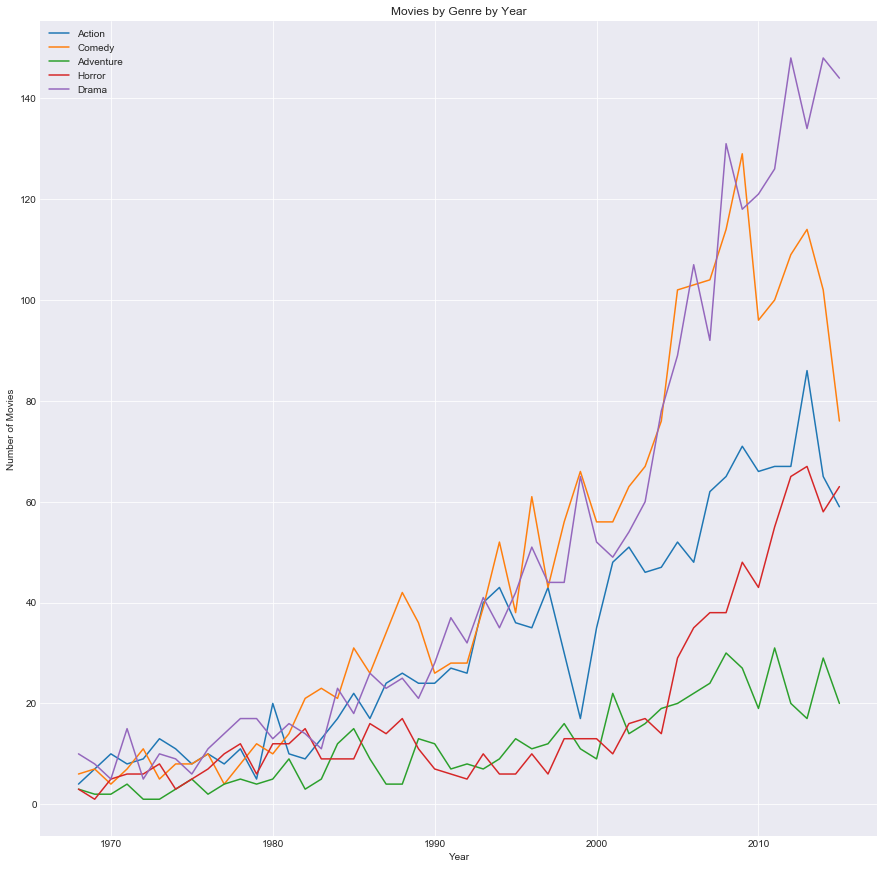

In [87]:
plt.figure(figsize=(15,15))
plt.plot(years_list, action_num, label='Action')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Action Movies by Year')

plt.plot(years_list, comedy_num, label='Comedy')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies by Genre by Year')

plt.plot(years_list, adventure_num, label='Adventure')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies by Genre by Year')

plt.plot(years_list, horror_num, label='Horror')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies by Genre by Year')

plt.plot(years_list, drama_num, label='Drama')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies by Genre by Year')

plt.legend();

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!